
#Overview of Project
We started by loading the Ames Housing dataset, which contains information on various features of houses in Ames, Iowa, along with their sale prices. The target variable in our dataset is SalePrice, which we aim to predict based on other features such as LotArea, YearBuilt, OverallQual, and so on.

#Step 1: Load the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AmesHousing.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


#Step 2: Initial Inspection

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale 

In [ ]:
# Display basic statistics of the dataset
print("Basic statistics of the dataset:")
print(df.describe())

Basic statistics of the dataset:
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537

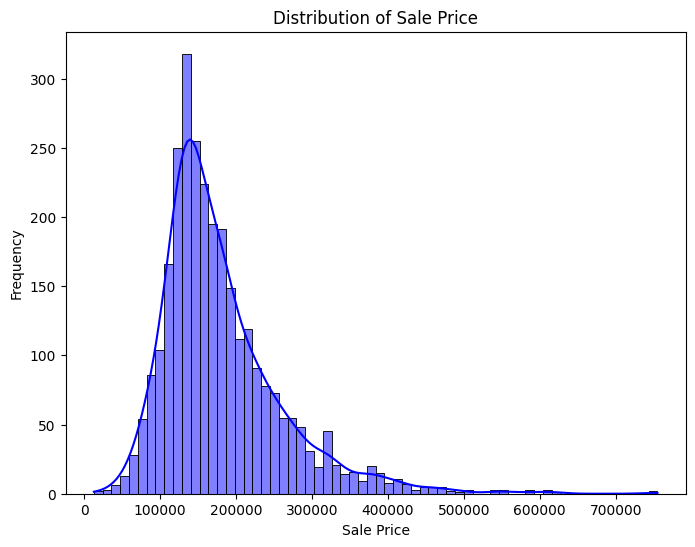

In [ ]:
# Visualize the distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Step 3: Handling Missing Values

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [ ]:
# Impute missing values using the mean for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [ ]:
# Impute missing values using the most frequent value for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

In [ ]:
# Verify that there are no missing values left
print("Are there any missing values left?")
print(df.isnull().sum().sum())

Are there any missing values left?
0


# Step 4: Handling Outliers

In [ ]:
# Identify outliers using the Isolation Forest algorithm
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(df[numerical_cols])

NameError: name 'IsolationForest' is not defined

In [ ]:
# Remove rows identified as outliers
df = df[outliers != -1]
print("Outliers removed. Dataset shape:", df.shape)

Outliers removed. Dataset shape: (2783, 82)


# Step 5: Feature Scaling

In [ ]:
# Perform Standardization (mean=0, std=1)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Perform Min-Max Scaling (range 0-1)
min_max_scaler = MinMaxScaler()
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# Step 6: Data Splitting

In [ ]:
# Define the target variable and features
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


# Step 7: Data Visualization and Analysis

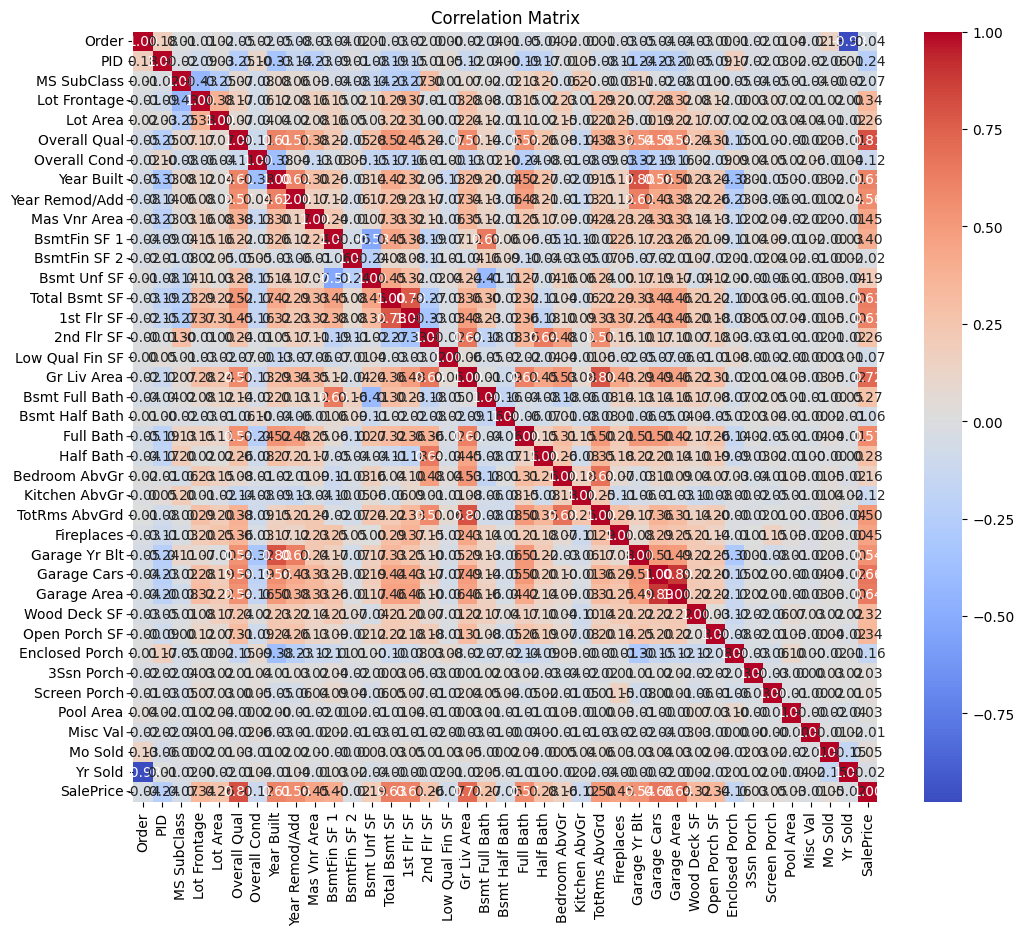

In [ ]:

# Correlation matrix to see the relationship between features
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation calculation
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix provided valuable insights into the relationships between features. For example, OverallQual showed a high positive correlation with SalePrice. This suggests that higher quality houses tend to sell for higher prices. Similarly, GrLivArea and GarageCars also had strong positive correlations with SalePrice, indicating that larger living spaces and bigger garages are associated with higher house prices. On the other hand, some features like MiscVal (Miscellaneous value) had very little correlation, suggesting they might not be as useful in predicting the target variable.

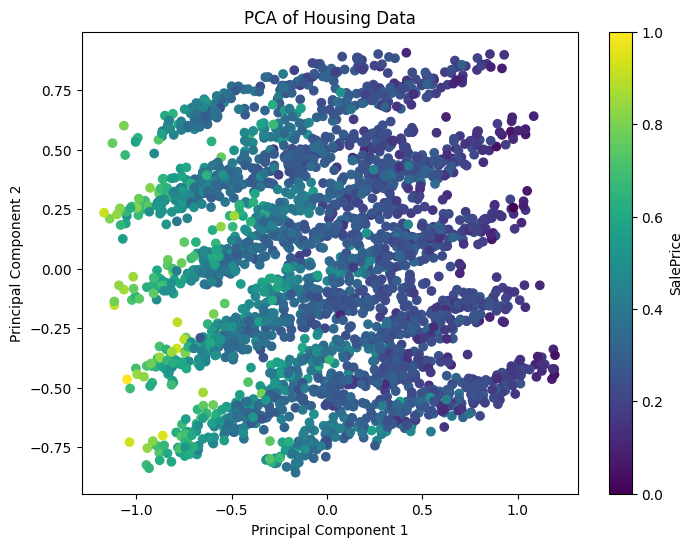

In [ ]:

# Handle non-numeric columns before applying PCA
X_numeric = X.select_dtypes(include=['number'])  # Select only numeric columns
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numeric)  # Apply PCA to numeric data

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label='SalePrice')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Housing Data')
plt.show()

This visualization revealed clusters in the data, showing how houses with similar features group together. We also observed that the first two principal components explain a significant portion of the variance, which means these components capture the most important information in the dataset.